In [3]:
# importing all the required pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rc("font",size=14)
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
df = pd.read_csv('/content/banking.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [5]:
df = df.dropna()

df.shape

(41188, 21)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [7]:
df.info()
#1.age (numeric)
#2.job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
#3.marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
#4.education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
#5.default: has credit in default? (categorical: “no”, “yes”, “unknown”)
#6.housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
#7.loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
#8.contact: contact communication type (categorical: “cellular”, “telephone”)
#9.month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
#10.day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
#11.duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before
#a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
#12.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#13.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#14.previous: number of contacts performed before this campaign and for this client (numeric)
#15.poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
#16.emp.var.rate: employment variation rate — (numeric)
#17.cons.price.idx: consumer price index — (numeric)
#18.cons.conf.idx: consumer confidence index — (numeric)
#19.euribor3m: euribor 3 month rate — (numeric)
#20.nr.employed: number of employees — (numeric)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

# EDA (Exploratory Data Analysis)

In [8]:
df["education"].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [9]:
df["education"] = np.where(df["education"] == 'basic.9y','Basic',df['education'])
df['education'] = np.where(df['education']== 'basic.6y','Basic',df['education'])
df['education'] = np.where(df['education']== 'basic.4y' , 'Basic',df['education'])

In [10]:
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [11]:
# the target variable is y which isweather a person has purchased a term insurance or not
df['y'].value_counts()

,count
y,
0,36548
1,4640


<Axes: xlabel='y', ylabel='count'>

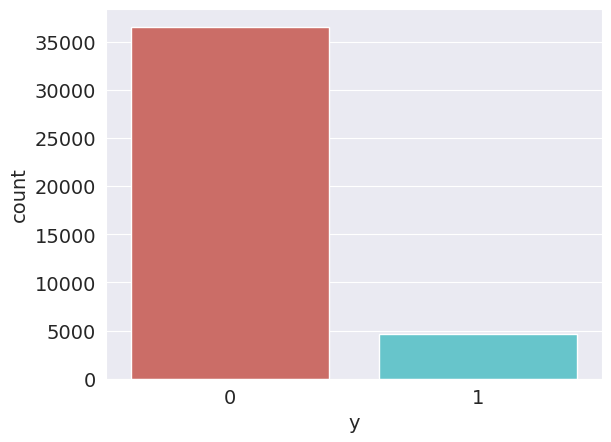

In [12]:
sns.countplot(x = 'y', data = df, palette = 'hls')

# Data Visualization

Text(0, 0.5, 'frequency of purchase')

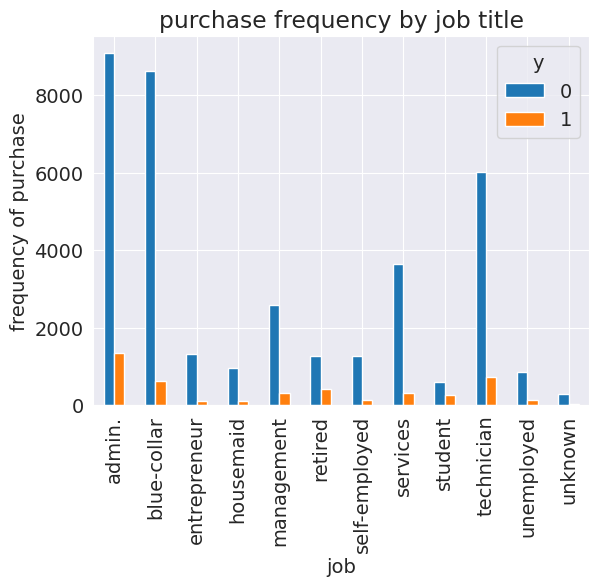

In [35]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('purchase frequency by job title')
plt.xlabel('job')
plt.ylabel('frequency of purchase')

**purchase by material status**

Text(0.5, 1.0, 'purchase frequency by marital status')

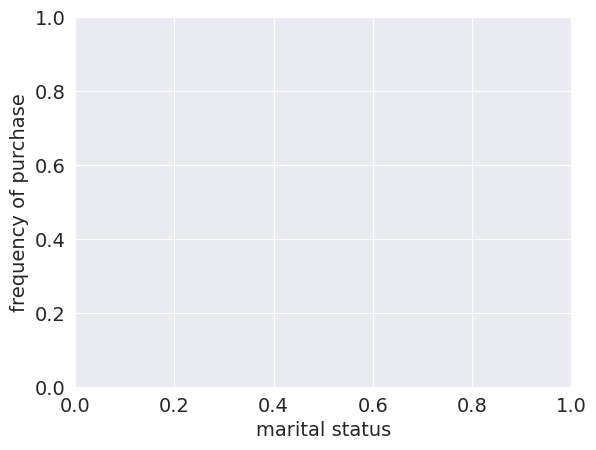

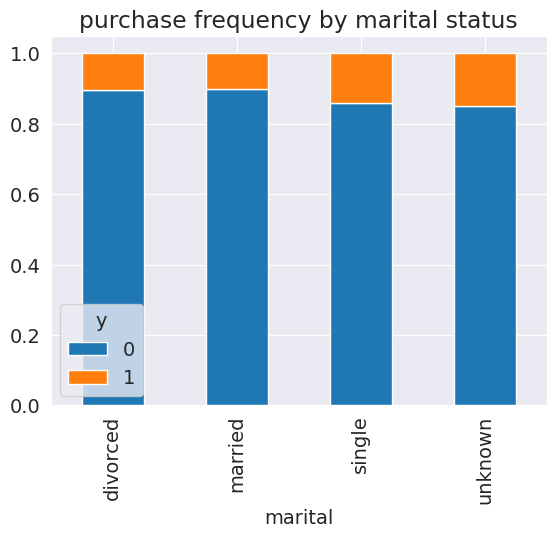

In [14]:
%matplotlib inline
tabel = pd.crosstab(df.marital,df.y)
plt.xlabel('marital status')
plt.ylabel('frequency of purchase')
tabel.div(tabel.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('purchase frequency by marital status')

there is no pattern in marital status and hence does not seems to be an important predictor

**purchase by education**

Text(0.5, 1.0, 'purchase frequency by education')

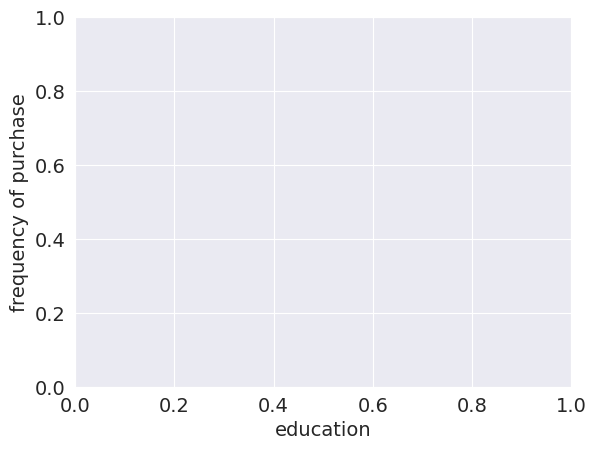

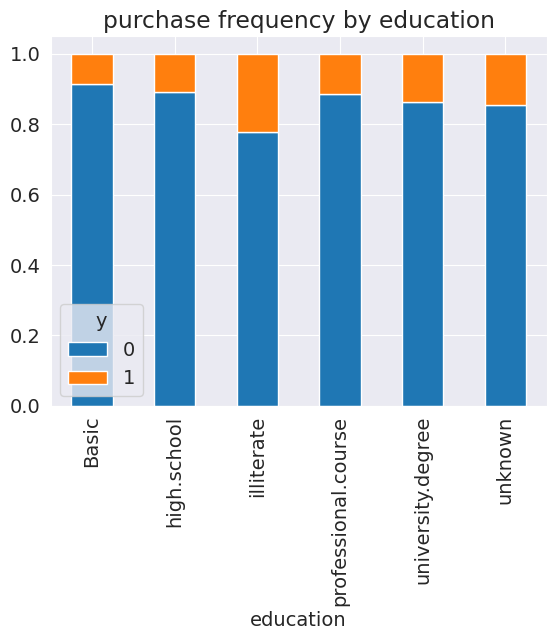

In [15]:
%matplotlib inline
table = pd.crosstab(df.education,df.y)
plt.xlabel('education')
plt.ylabel('frequency of purchase')
table.div(table.sum(1).astype(float),axis = 0).plot(kind='bar',stacked=True)
plt.title('purchase frequency by education')

education seems an important in predicting the success - illitrate people is purchase more policy or easly get convenced

**purchase quantity by month**

Text(0.5, 1.0, 'purchase frequency by month')

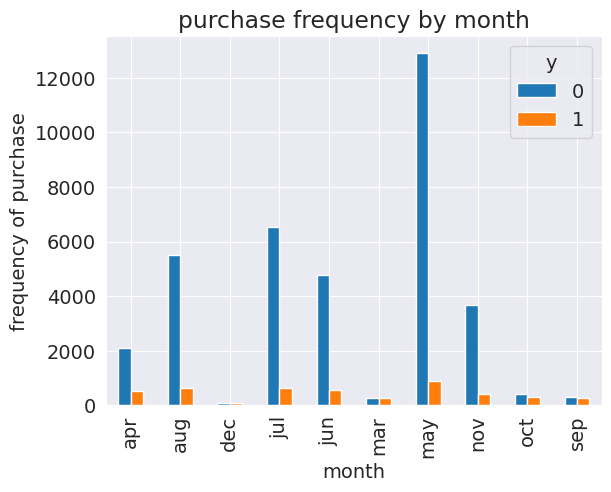

In [16]:
%matplotlib inline
table = pd.crosstab(df.month,df.y).plot(kind='bar')
plt.xlabel('month')
plt.ylabel('frequency of purchase')
plt.title('purchase frequency by month')

no of conversions seems to be seasonal and months seems to play an important role

**understanding the day of week effect**

Text(0.5, 1.0, 'purchase frequency by day of week')

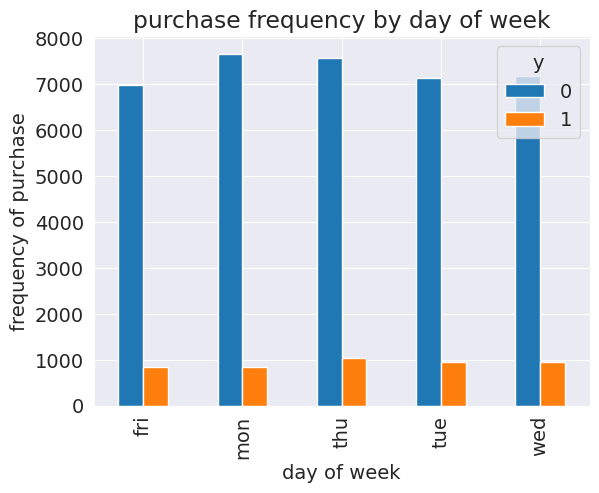

In [17]:
%matplotlib inline
table = pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.xlabel('day of week')
plt.ylabel('frequency of purchase')
plt.title('purchase frequency by day of week')

thus day of the week does not seems to contain much infromation hence it is not an important predictor factor

purchase frequency by previous outcomes

Text(0.5, 1.0, 'purchase frequency by previous outcomes')

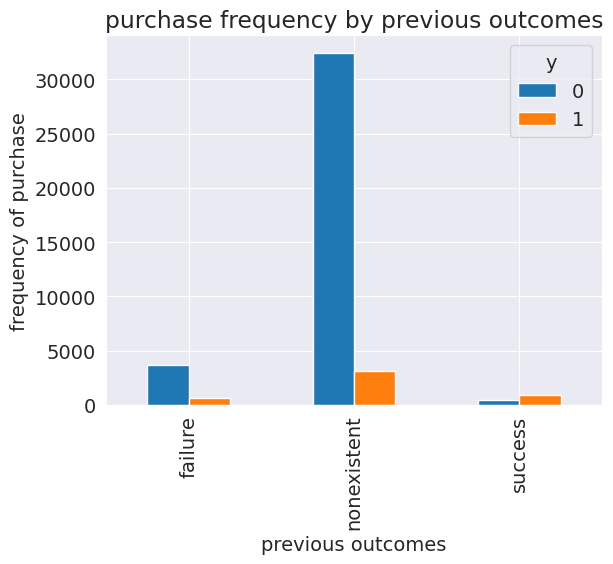

In [18]:
%matplotlib inline
table = pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.xlabel('previous outcomes')
plt.ylabel('frequency of purchase')
plt.title('purchase frequency by previous outcomes')

thus new target customer seems to convey more

# Creating Dummy variable

In [19]:
categorical_variable_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for var in categorical_variable_cols:
  categ_list = 'var'+var
  categ_list = pd.get_dummies(df[var],prefix=var)
  df1 = df.join(categ_list)
  df = df1

# creating field to keep
df_vars = df.columns.values.tolist()
to_keep = [i for i in df_vars if i not in categorical_variable_cols]

**final column to keep**

In [20]:
final_df = df[to_keep]
final_df.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [21]:
df_final_vars = final_df.columns.values.tolist()
y=['y']
X = [i for i in df_final_vars if i not in y]

RFE selects features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Fix: Use keyword argument for number of features
rfe = RFE(estimator=logreg, n_features_to_select=18)

# Ensure X and y are correct column names or variables
rfe = rfe.fit(final_df[X], final_df[y])

Selected_Features_Support = list(rfe.support_)
Selected_Features_rank = list(rfe.ranking_)

print(Selected_Features_Support)
print(Selected_Features_rank)


[np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_]
[np.int64(33), np.int64(31), np.int64(12), np.int64(35), np.int64(1), np.int64(16), np.int64(22), np.int64(18), np.int64(1), np.int64(30), np.int64(29), np.int64(1), np.int64(3), np.int64(36), np.int64(39), np.int64(1), np.int64(40), np.int64(1), np.int64(1), np.int64(23), np.int64(26), np.int64(42), np.int64(32), np.int64(27), np.int64(13), np

The RFE has helped us select the following features: “previous”, “euribor3m”, “job_blue-collar”, “job_retired”, “job_services”, “job_student”, “default_no”, “month_aug”, “month_dec”, “month_jul”, “month_nov”, “month_oct”, “month_sep”, “day_of_week_fri”, “day_of_week_wed”, “poutcome_failure”, “poutcome_nonexistent”, “poutcome_success”.

Selecting only these columns:

In [23]:
columns_final = ["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no",
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed",
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"]

X = final_df[columns_final]
y = final_df['y']

# Model Implementation

Running the final model with the selected features.

** Train vs Test : 70% vs 30%**

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

Creating the final model :

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

** Predicting the test set results, and calculating the accuracy**

In [26]:

y_pred = logreg.predict(X_test)

## Calculating the accuracy

print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.900299


# Creating the truth table (Confusion Matrix)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10872   109]
 [ 1123   253]]


Thus, True Positive = 10872, False Positive = 1122, True Negative = 254, False Negative = 109

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F score = 2 * (Precision * Recall)/(Precision + Recall)

** Calculating Precission, Recall & F1 score**

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.70      0.18      0.29      1376

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



# ROC Curve

Text(0, 0.5, 'True Positive Rate')

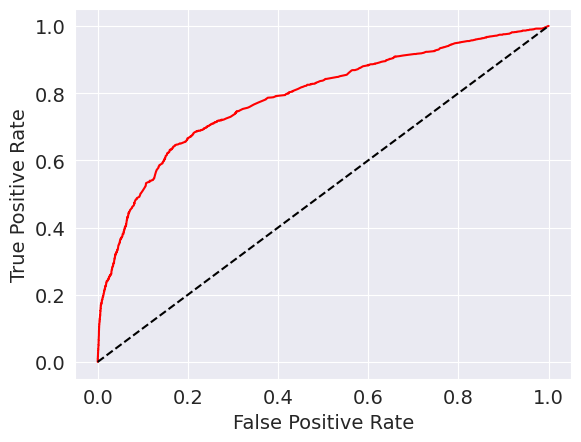

In [32]:
#ROC Curve
from sklearn.metrics import roc_curve # roc - reciver operating characteristics
from sklearn.metrics import roc_auc_score # auc - area under curve
fpr , tpr , thresholds = roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
# we want to predict the probability value of x data
#predict_proba returns probability estimates of all the classes
# results are orderd by the lable of classes ie 0 or 1
#[:,1] will get the predicted probabilities of postive lable only
auc = roc_auc_score(y_test,y_pred) # compute roc_auc_score based on y and y hat

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

AUC Score: 0.7871060121287721


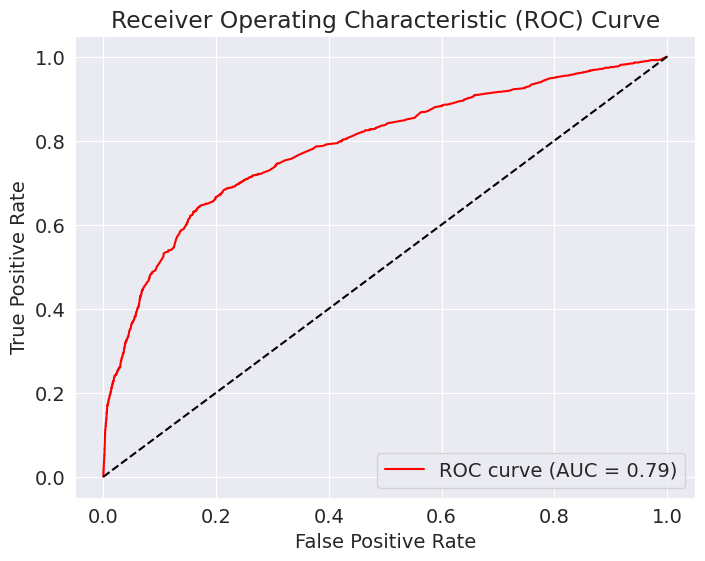

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (class 1)
y_probs = logreg.predict_proba(X_test)[:, 1]

# Compute False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute Area Under Curve (AUC)
auc = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [34]:
auc

np.float64(0.7871060121287721)